# Cheetos Puffs Good/Bad Surface Appearance Image Multi-class Classification

The goal is to use a machine learning algorithm to process image data coing from the cameras inside potato peeler machines. The team 
hopes to create a separate model to predict potato peel percentage, trained on only good images, so this code is a pre-processing step to ensure 
we only train using good images.

There are many factors that contribute to a "bad" image. Images are considered "bad" if they are blurry, are white-washed due to the camera rinse, are of empty peelers, are too dark, etc.  
"Good" images clearly show the potatoes within the peelers. 

This code builds a binary classification model using Tensorflow to sort images into two classes; Good and Bad images. The images are sorted into two file locations depending on their classification. 

This code is adapted from multiple TensorFlow tutorials, including:  
Image Classification: https://www.tensorflow.org/tutorials/images/classification  
Load images: https://www.tensorflow.org/tutorials/load_data/images

Other TF tutorials Ifound helpful were:  
https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough#the_iris_classification_problem  
Preprocessing data: https://www.tensorflow.org/guide/data#preprocessing_data  

@author: Keith chan

# Import Packages

In [1]:
# Import Tensorflow and the Keras classes needed to construct our model.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

from pathlib import Path

import time

In [2]:
from platform import python_version
print(python_version())

3.7.4


In [3]:
tf.__version__

'2.1.0'

# Load Training Data 

In [4]:
path = r"C:\Users\80203607\git\Cheetos Puffs PAE\Multiclassification\Training Images"
path = Path(path)
path

WindowsPath('C:/Users/80203607/git/Cheetos Puffs PAE/Multiclassification/Training Images')

In [5]:
good_dir = path.joinpath('Good Cheetos')
bad_dir = path.joinpath('Bad Cheetos')
questionable_dir = path.joinpath('Questionable Cheetos')

In [6]:
num_good_images = len(os.listdir(good_dir))
num_bad_images = len(os.listdir(bad_dir))
num_questionable_images = len(os.listdir(questionable_dir))

print('total training good images:', num_good_images)
print('total training bad images:', num_bad_images)
print('total training questionable images:', num_questionable_images)

total training good images: 549
total training bad images: 369
total training questionable images: 249


# Data Preparation

In [7]:
#For convenience, set up variables to use while pre-processing the dataset and training the network.
batch_size = 64
# epochs = 10
epochs = 600
IMG_HEIGHT = 500
IMG_WIDTH = 500

In [8]:
# Generator for our training data
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical',
                                                           subset='training')

Found 936 images belonging to 3 classes.


In [10]:
val_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=path,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical',
                                                              subset='validation')

Found 231 images belonging to 3 classes.


In [11]:
# The following 2 cells show me that train_data_gen is a collection of multiple batches of [batch_size] images, each of which are 150X150 and have 3 RGB elements, and have a binary label (0 or 1)
train_data_gen[0][0].shape

(64, 500, 500, 3)

In [12]:
# train_data_gen[0]

# Visualizing Training Images

In [13]:
# My question for now is how do which label goes with which one-hot encoding?
class_names = ['Good', 'Bad', 'Questionable']

C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


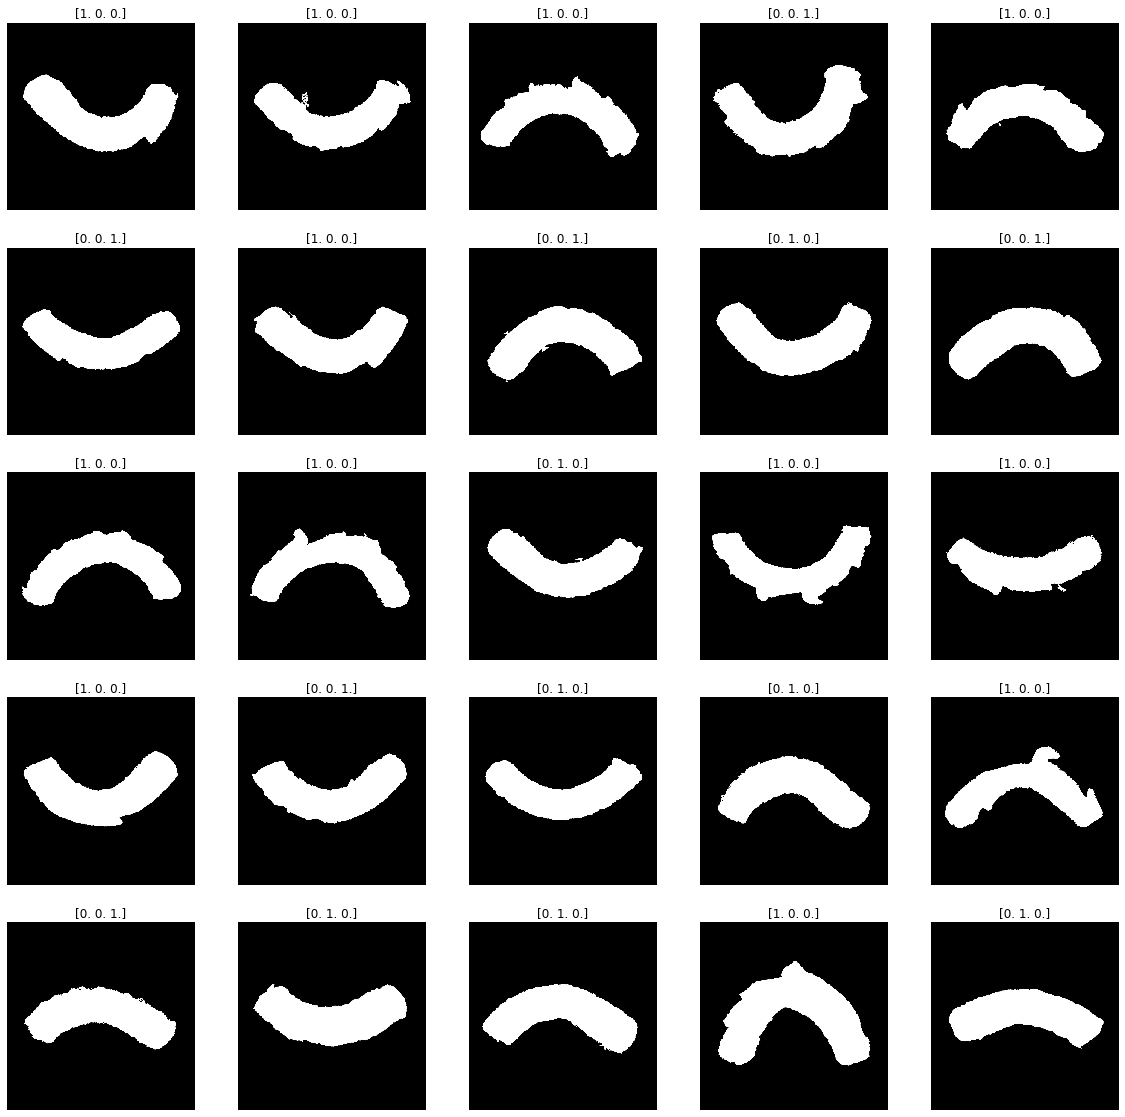

In [14]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

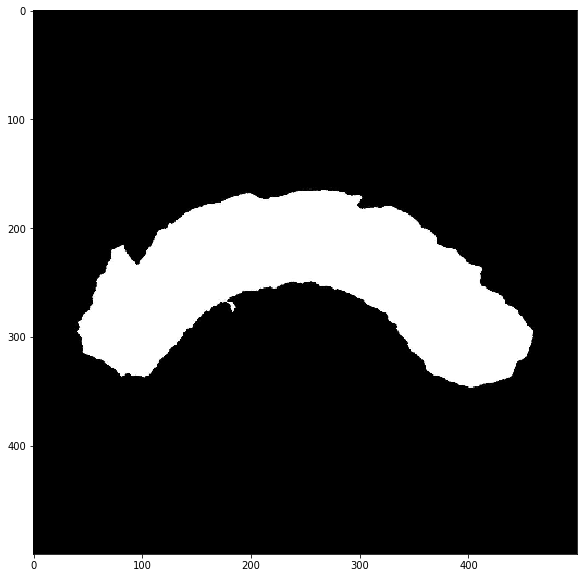

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[4])

# Create/Train the Model

In [16]:
%%time

# Define model parameters
nfil1 = 32
nfil2 = 64
nfil3 = 64
ksize = 5
dropout = 0.2
dense1 = 512
import mlflow.tensorflow
import mlflow

# Enable auto-logging to MLflow to capture TensorBoard metrics.
mlflow.tensorflow.autolog()

with mlflow.start_run():
    mlflow.log_param("nfil1", nfil1)
    mlflow.log_param("nfil2", nfil2)
    mlflow.log_param("nfil3", nfil3)
    mlflow.log_param("ksize", ksize)
    mlflow.log_param("dropout", dropout)
    mlflow.log_param("dense1", dense1)
#     mlflow.log_metric("rmse", 2)
#     mlflow.log_metric("r2", 3)
#     mlflow.log_metric("mae", 4)

################IMPROVEMENTS########################
    model = Sequential()
    model.add(Conv2D(nfil1, ksize, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),)
    model.add(MaxPooling2D())
    model.add(Conv2D(nfil2, ksize, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(nfil2, ksize, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(dense1, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(3, activation='softmax'))
####################################################

#     model = Sequential([
#         Conv2D(nfil1, ksize, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#         MaxPooling2D(),
#     #     Dropout(0.2),
#         Conv2D(nfil2, ksize, padding='same', activation='relu'),
#         MaxPooling2D(),
#     #     Dropout(0.2),
#         Conv2D(nfil3, ksize, padding='same', activation='relu'),
#         MaxPooling2D(),
#         Dropout(dropout),
#         Flatten(),
#         Dense(dense1, activation='relu'),
#         Dropout(dropout),
#         Dense(3, activation='softmax')
#     ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy
                  metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

    model.summary()

    output_dir = os.getcwd() + "\\train-output\\" + datetime.strftime(datetime.now(), '%Y-%m-%d_%H%M%S')
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=output_dir+'\\model_{epoch}.h5', verbose=1)
    
#################IMPROVEMNTS########################
    from tensorflow.keras.callbacks import EarlyStopping
    early_stop =  EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
####################################################

    # This is new code because I encountered some error about IOError: image file is truncated (18 bytes not processed)
    from PIL import ImageFile
    ImageFile.LOAD_TRUNCATED_IMAGES = True

    history = model.fit(
        train_data_gen,
        steps_per_epoch=train_data_gen.samples // batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=val_data_gen.samples // batch_size,
        callbacks=[modelcheckpoint_callback, early_stop]

    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 500, 500, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 64)      102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0

KeyboardInterrupt: 

In [17]:
import pandas as pd
loss_df = pd.DataFrame(history.history)
loss_df.head()
loss_df.plot(y=['accuracy', 'val_accuracy'])
loss_df.plot(y=['loss', 'val_loss'])

NameError: name 'history' is not defined

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predictions on validation

In [ ]:
################IMPROVEMENTS########################
val_image, val_label = next(val_data_gen)
predictions = model.predict_classes(val_image)

In [ ]:
predictions

In [ ]:
lst=[]
for label in val_label:
    lst.append(np.argmax(label))
    
y_test = np.array(lst)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))
####################################################

In [ ]:
i need to add gridsearch and add early stopping


# Making Predictions using awful for loops

In [ ]:
model_filepath = r"C:\Users\80203607\git\Cheetos Puffs PAE\Multiclassification\train-output\2020-07-27_232732\model_14.h5"
model = tf.keras.models.load_model(model_filepath)

In [ ]:
test_dir = r"C:\Users\80203607\git\Cheetos Puffs PAE\Multiclassification\Testing Images"
print(test_dir)

# how do i load test images?
# i think I need to rescale my test images (divide by 255) and also resize them to 150X150
# i don't need to use flow_from_directory (image,label) pairs
# test_images = test_images / 255.0
# test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [ ]:
test_dir = Path(test_dir)
test_dir

In [ ]:
list_ds = tf.data.Dataset.list_files(str(test_dir/'*'))

for f in list_ds.take(5):
  print(f.numpy())

In [ ]:
type(list_ds)

In [ ]:
timer_start = time.time()

test_images = []

for f in list_ds:
    img = tf.io.read_file(f)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])
    img = img/255.0
    test_images.append(img)


In [ ]:
type(img)

In [ ]:
# Expanding the dimensions for each image
test_images_2 = []
for img in test_images:
    img = (np.expand_dims(img,0))
    test_images_2.append(img)

In [ ]:
timer_end = time.time()
print(timer_end - timer_start)

test_images_2[4].shape

In [ ]:
len(test_images_2)

In [ ]:
for i in range(10):
    predictions = model.predict(test_images_2[i])
    print(np.argmax(predictions))
    print(predictions)

In [ ]:
timer_start = time.time()

predictions = []
for i in range(len(test_images)):
    predictions.append(np.argmax(model.predict(test_images_2[i])))
    
timer_end = time.time()
print(timer_end - timer_start)

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

image_batch = test_images
label_batch = predictions
show_batch(image_batch, label_batch)

# Making predictions using batch

In [ ]:
# load the model used to make predictions
# model_3.h5 from 2020-06-08_173641 had a loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.1302 - val_accuracy: 0.9713
# model_7.h5 from 2020-06-29_100806 had a loss: 0.5043 - accuracy: 0.9962 - recall: 0.9963 - precision: 0.9962 - val_loss: 0.5151 - val_accuracy: 0.9786 - val_recall: 0.9964 - val_precision: 0.9623
model_filepath = r"C:\Users\80203607\git\zion\advpeel\train_image_classification\train-output\2020-06-29_100806\model_7.h5"
model = tf.keras.models.load_model(model_filepath)

In [ ]:
test_dir = r"D:\zion\Good1"
test_dir = Path(test_dir)
test_dir

In [ ]:
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_gen = test_image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=batch_size,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))


In [ ]:
# Predictions made using a batched data pipeline took around 35min
timer_start = time.time()

predictions = model.predict(test_image_gen)
predictions

timer_end = time.time()
print(timer_end - timer_start)

In [ ]:
# Currently the show_batch function only works for the first batch of predictions since the image_batch parameter is populated by a generator while the label_batch parameter is unchanged. 

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(64):
      ax = plt.subplot(8,8,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

image_batch,_ = next(test_image_gen)
label_batch = predictions
show_batch(image_batch, label_batch)

# Alternatively 

Another way to preprocess images for prediction is to use a Dataset.map() transformation to predict on a tf.data.Dataset
https://www.tensorflow.org/guide/data#preprocessing_data

# Sorting Test Images

In [ ]:
# Function that can be used by online code
def process_image_and_predict(image_path, model):
    IMG_WIDTH = IMG_HEIGHT = 150
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])
    img = img/255.0
    img_batch = (np.expand_dims(img,0))
    prediction = model.predict(img_batch)

    return prediction[0][0]


In [ ]:
# Function to sort image into proper folder destination given the prediction
def sort_image(image_path, prediction):
    source_file = image_path.numpy().decode('utf-8')
    destination_filename = str(prediction) + '_' + pathlib.Path(source_file).name 
    if prediction > 0.5:
        shutil.copy(source_file, good_destination + '\\' + destination_filename)
    else:
        shutil.copy(source_file, bad_destination + '\\' + destination_filename)

In [ ]:
import shutil 
import pathlib

# Create folder locations to sort images into
good_destination = r"D:\zion\good_dest1"
bad_destination = r"D:\zion\bad_dest1"
pathlib.Path(good_destination).mkdir(parents=True, exist_ok=True)
pathlib.Path(bad_destination).mkdir(parents=True, exist_ok=True)

# get all the image files to make predictions on
path = r"D:\zion\Good1\Good"
test_dir = pathlib.Path(path)
list_ds = tf.data.Dataset.list_files(str(test_dir/'*'))

# load the model used to make predictions
# model_3.h5 from 2020-06-08_173641 had a loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.1302 - val_accuracy: 0.9713
model_filepath = r"C:\Users\80203607\git\zion\advpeel\train_image_classification\train-output\2020-06-26_162453\model_7.h5"
model = tf.keras.models.load_model(model_filepath)

# Make predictions on one image at a time
for f in list_ds.take(5):
    print(f.numpy())
    prediction = process_image_and_predict(image_path=f, model=model)
    print(prediction)
    sort_image(image_path = f, prediction = prediction)
